In [1]:
#basic imports

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

import tensorflow as tf
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as tfl
from tensorflow.keras.callbacks import TensorBoard
import time
import pickle

In [2]:
#model name
NAME="devnagri-{}".format(int(time.time()))

In [3]:
# TensorBoard
tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))

# GPU
gpu_options=tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess=tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [2]:
# load the directory where image(or dataset) folders are

DATADIR='C:\IDK\ML\Devnagri\DevanagariHandwrittenCharacterDataset\Train'
CATEGORIES=["0","1","2","3","4","5","6","7","8","9",
           "adna","ba","bha","cha","chha","da","dha","daa","dha","dhaa","ga",
           "gha","gya","ha","ja","jha","ka","kha","kna","ksha","la","ma","na",
           "pa","pha","ra","sa","sh","t","ta","tha","tra","waw","yaw","yna"]


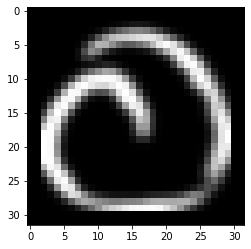

0


In [3]:
# this is just to test if loading is working
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        print(category)
        break
    break

In [4]:
print(img_array)
print(np.shape(img_array))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(32, 32)


(32, 32)


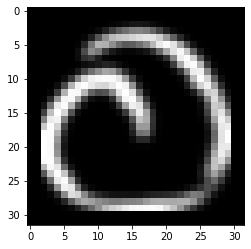

(1, 32, 32, 1)


In [8]:
# to make sure all images are of the same size and in grayscale(grayscale not necessary
# but helpful in reducing the file sizes)

IMG_SIZE=32
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
print(np.shape(new_array))
plt.imshow(new_array,cmap='gray')
plt.show()
image=np.array(new_array).reshape((-1, 32, 32, 1))
print(np.shape(image))

In [30]:
# creating the training data from the images dataset

training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                #image = tf.image.decode_jpeg(new_array)
                image = tf.cast(new_array, tf.float32)
                training_data.append([image,class_num])
            except Exception as e:
                pass
create_training_data()

In [31]:
import random
random.shuffle(training_data)

In [32]:
# separate out features and labels

X=[]
y=[]

for features, labels in training_data:
    X.append(features)
    y.append(labels)
    
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [33]:
# to save X,y as proper training data

import pickle

pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [40]:
X=pickle.load(open("X.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))

In [43]:
X=np.array(X)
y=np.array(y)

In [44]:
print(X)

[[[[ 0.]
   [ 0.]
   [ 0.]
   ...
   [ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   ...
   [ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   ...
   [ 0.]
   [ 0.]
   [ 0.]]

  ...

  [[ 0.]
   [ 0.]
   [12.]
   ...
   [ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   ...
   [ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   ...
   [ 0.]
   [ 0.]
   [ 0.]]]


 [[[ 0.]
   [ 0.]
   [ 0.]
   ...
   [ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   ...
   [ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   ...
   [ 0.]
   [ 0.]
   [ 0.]]

  ...

  [[ 0.]
   [ 0.]
   [ 0.]
   ...
   [41.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   ...
   [ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   ...
   [ 0.]
   [ 0.]
   [ 0.]]]


 [[[ 0.]
   [ 0.]
   [ 0.]
   ...
   [ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   ...
   [ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   ...
   [ 0.]
   [ 0.]
   [ 0.]]

  ...

  [[ 0.]
   [ 0.]
   [ 0.]
   

In [45]:
#building the model

model=Sequential()
# layer 1
model.add(tfl.Conv2D(64,(3,3)))
model.add(tfl.Activation('relu'))
model.add(tfl.MaxPooling2D(pool_size=(2,2)))
#layer 2
model.add(tfl.Conv2D(64,(3,3)))
model.add(tfl.Activation('relu'))
model.add(tfl.MaxPooling2D(pool_size=(2,2)))
# Dense
model.add(tfl.Flatten())
model.add(tfl.Dense(64))
model.add(tfl.Activation('relu'))
# o/p layer
model.add(tfl.Dense(1))        # 1 for binary class
model.add(tfl.Activation('sigmoid'))

# compilation, loss, accuracy, optimizer
model.compile(loss='CategoricalCrossentropy',
             optimizer='adam',metrics=['accuracy','AUC'])

# fitting
model.fit(X,y,validation_split=0.1,batch_size=200,epochs=5,callbacks=[tensorboard])

Epoch 1/5
345/345 [==============================] - 12s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0221 - auc: 0.5014 - val_loss: 0.0000e+00 - val_accuracy: 0.0235 - val_auc: 0.5000
Epoch 2/5
345/345 [==============================] - 4s 13ms/step - loss: 0.0000e+00 - accuracy: 0.0221 - auc: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0235 - val_auc: 0.5000
Epoch 3/5
345/345 [==============================] - 4s 13ms/step - loss: 0.0000e+00 - accuracy: 0.0221 - auc: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0235 - val_auc: 0.5000
Epoch 4/5
345/345 [==============================] - 4s 13ms/step - loss: 0.0000e+00 - accuracy: 0.0221 - auc: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0235 - val_auc: 0.5000
Epoch 5/5
345/345 [==============================] - 4s 13ms/step - loss: 0.0000e+00 - accuracy: 0.0221 - auc: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0235 - val_auc: 0.5000
